In [1]:
# How to use our code for the Applied Data Science coursework
# 1. Import our package(s) and other useful tools
import pandas as pd
from applied_data_science.sentiment_pipeline import SentimentPipeline
from applied_data_science.time_series import get_time_series, get_change_points
from applied_data_science.data_access import get_filtered_stream_tweets as get_tweets
from applied_data_science.geo_visualisation import clean_locations, plotGlobalSentiments, filter_locations
from plotly.offline import iplot

import matplotlib.pyplot as plt
from datetime import date

/home/rafael/Desktop/applied_data_science/applied-data-science


In [2]:
# 2. Get some tweets and pickle them
original_df = get_tweets(start_date= date(2021, 3, 23), end_date=date(2021, 4, 20))
original_df.to_pickle("filter_data.pkl")

Downloading: 100%|██████████| 397586/397586 [00:22<00:00, 17709.02rows/s]


In [3]:
# Load tweets back in
df = pd.read_pickle("vaccine_data.pkl") # read from pickle
df.columns = ['id', 'location', 'text', 'date'] # set headers
df['date'] = pd.to_datetime(df['date']) # parse dates
df.head(10)

,id,location,text,date
0,1372636295479111684,"Ferndale, MI",I'd like to thank pizza and @tacobell for maki...,2021-03-18 19:49:29+00:00
1,1332751430281801730,"Belfast, Northern Ireland",Santa could not have brought anything better t...,2020-11-28 18:21:16+00:00
2,1354175024622657548,"Bethesda, MD",⁦@VP⁩ Harris got her second #COVID19 vaccine d...,2021-01-26 21:10:59+00:00
3,1336645501731696641,NYC/FL,$PFE - Head of FDA Advisory Panel Predicts App...,2020-12-09 12:14:55+00:00
4,1341085941952172032,New Mexico,"Marsha Castillo, Care Management Assistant, re...",2020-12-21 18:19:39+00:00
5,1352805501914865665,Everwhere,mRNA Vaccine for Multiple Sclerosis! Recent La...,2021-01-23 02:29:00+00:00
6,1360042627702349825,"Staten Island, NY",This is disgusting and it is criminal! \n\n@NY...,2021-02-12 01:46:45+00:00
7,1354183869352828929,"Heath, TX",The Biden administration is boosting the weekl...,2021-01-26 21:46:08+00:00
8,1371864337929924618,"Chicago, IL","Ankit Bharat, MD @AnkitBharatMD, was featured ...",2021-03-16 16:42:00+00:00
9,1375478954358882309,"ÜT: 40.794316,-74.349981",. @govmurphy announces FEMA to open huge COVID...,2021-03-26 16:05:12+00:00


In [4]:
# 3. Process your tweets in the sentiment pipelien
# set workers <= CPU cores, set chunksize based on dataset size (use no greater than dataset_size/workers)
# threshold reccommended by VADER docs, change default labels if you want
# configure cleaning techniques (making text lower case, removing URLs, removing usernames, remove the # of a hashtag but keeping the text)
pipe = SentimentPipeline(workers=10, chunksize=10000, make_lower=False, remove_url=True, remove_user=True, remove_hash=False, threshold=0.05, pos_label=1, neu_label=0, neg_label=-1) 
df = pipe(df)
# df.to_pickle('sentimentDf.pkl')
df.head(10) # note it is now indexed by time


CLEANING
100%|██████████| 2128673/2128673 [00:04<00:00, 486886.87it/s]

ANALYSING
100%|██████████| 2128673/2128673 [00:36<00:00, 58548.62it/s]

CLASSIFYING
100%|██████████| 2128673/2128673 [00:01<00:00, 1497838.40it/s]

DONE


,id,location,text,date,clean_texts,sent_scores,sents
0,1372636295479111684,"Ferndale, MI",I'd like to thank pizza and @tacobell for maki...,2021-03-18 19:49:29+00:00,I'd like to thank pizza and for making me el...,0.6124,1
1,1332751430281801730,"Belfast, Northern Ireland",Santa could not have brought anything better t...,2020-11-28 18:21:16+00:00,Santa could not have brought anything better t...,0.7003,1
2,1354175024622657548,"Bethesda, MD",⁦@VP⁩ Harris got her second #COVID19 vaccine d...,2021-01-26 21:10:59+00:00,⁦ Harris got her second #COVID19 vaccine dose...,0.5972,1
3,1336645501731696641,NYC/FL,$PFE - Head of FDA Advisory Panel Predicts App...,2020-12-09 12:14:55+00:00,$PFE - Head of FDA Advisory Panel Predicts App...,0.4767,1
4,1341085941952172032,New Mexico,"Marsha Castillo, Care Management Assistant, re...",2020-12-21 18:19:39+00:00,"Marsha Castillo, Care Management Assistant, re...",0.4939,1
5,1352805501914865665,Everwhere,mRNA Vaccine for Multiple Sclerosis! Recent La...,2021-01-23 02:29:00+00:00,mRNA Vaccine for Multiple Sclerosis! Recent La...,0.1511,1
6,1360042627702349825,"Staten Island, NY",This is disgusting and it is criminal! \n\n@NY...,2021-02-12 01:46:45+00:00,This is disgusting and it is criminal! \n\n a...,0.2629,1
7,1354183869352828929,"Heath, TX",The Biden administration is boosting the weekl...,2021-01-26 21:46:08+00:00,The Biden administration is boosting the weekl...,0.3400,1
8,1371864337929924618,"Chicago, IL","Ankit Bharat, MD @AnkitBharatMD, was featured ...",2021-03-16 16:42:00+00:00,"Ankit Bharat, MD was featured in magazine,...",-0.2732,-1
9,1375478954358882309,"ÜT: 40.794316,-74.349981",. @govmurphy announces FEMA to open huge COVID...,2021-03-26 16:05:12+00:00,. announces FEMA to open huge COVID vaccine ...,0.3182,1


<AxesSubplot:ylabel='Frequency'>

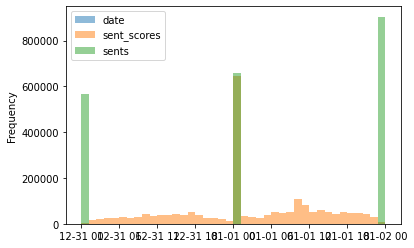

In [5]:
# Optional: visualise sentiment distribution
df.plot.hist(bins=40, alpha=0.5)

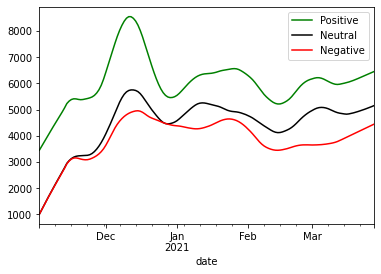

In [6]:
# 4. Generate time series data of tweet sentiment
# control seasonal/trend/residual decomposition (True = keep, False = remove)
# control normalisation (i.e. % of total )
# period: an odd number to represent the seasonality period (e.g. 7:weekly, 13:fortnightly, etc...)
pos, neu, neg = get_time_series(df, seasonal=False, trend=True, resid=False, period=13, norm=False)

def plot_time_series(pos, neu, neg):
    ax = plt.gca()
    pos.plot.line(color={'count':'green'}, ax=ax)
    neu.plot.line(color={'count':'k'}, ax=ax)
    neg.plot.line(color={'count':'red'}, ax=ax)
    ax.legend(["Positive", "Neutral", "Negative"])
    plt.show()

plot_time_series(pos, neu, neg)

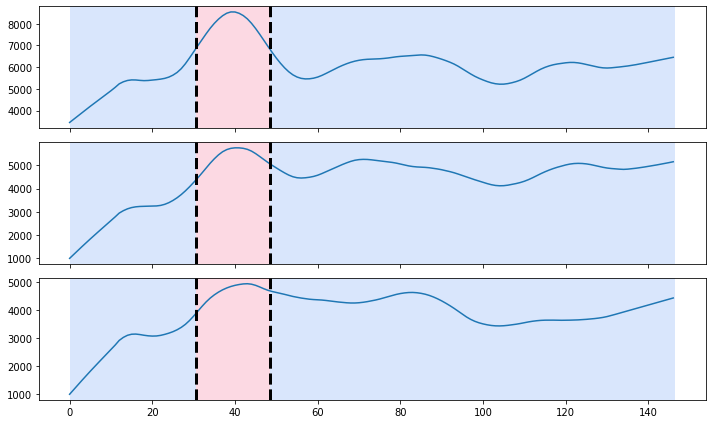

array(['2020-12-03T00:00:00.000000000', '2020-12-21T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [7]:
# Determine change points
get_change_points(pos, neu, neg, plot=True)

In [8]:
# Process and clean locations
df = clean_locations(df, workers=3, chunksize=100000)
df.head(20)
df.to_pickle('locatedDf.pkl')


PRE-PROCESSING

100%|██████████| 1609158/1609158 [00:00<00:00, 1901640.27it/s]

CLEANING

100%|██████████| 1609158/1609158 [01:22<00:00, 19533.36it/s]


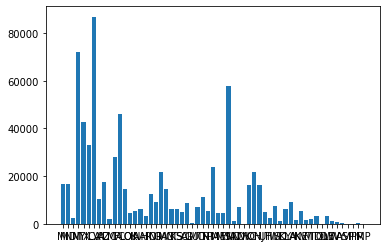

In [9]:
# Plot the proportions of positive tweets per state (note that it also returns the total count of tweets per state)
# threshold=None for raw proportions, or threshold=<value between 0 and 1> to apply thresholding
fig, counts = plotGlobalSentiments(threshold=None)
iplot(fig)
plt.bar(counts.keys(), counts.values())
plt.show()

In [10]:
# Plot election results
# Requires you to first download some files from kaggle 
# president_county_candidate.csv from https://www.kaggle.com/unanimad/us-election-2020?select=president_county_candidate.csv
# world_country_and_usa_states_latitude_and_longitude_values.csv from https://www.kaggle.com/paultimothymooney/latitude-and-longitude-for-every-country-and-state?select=world_country_and_usa_states_latitude_and_longitude_values.csv
import plotly.graph_objs as go

df = pd.read_csv('president_county_candidate.csv')
df = df[(df['party']=='DEM') | (df['party']=='REP')] # Selecting only democratic and republican party.


df = df.groupby(['state','party']).sum().unstack()

df.drop('won', axis=1, inplace=True)
df.columns = ['DEM','REP']

# Percentage of Democratic Party votes.
df['DEM percent'] = df['DEM']/(df['REP']+df['DEM']) *100
def threshold(val, thresh=50):
    if val > thresh:
        return 1
    else:
        return 0

df['DEM percent'] = df['DEM percent'].map(threshold)

print(df['DEM percent'], )
state_code = pd.read_csv("world_country_and_usa_states_latitude_and_longitude_values.csv")
state_code = state_code[['usa_state_code','usa_state']]

state_code = state_code.dropna()
df = df.merge(state_code, left_on='state',right_on='usa_state')
data = dict(type = 'choropleth',
           locations = df['usa_state_code'],
           locationmode = 'USA-states',
           colorscale = 'RdBu', #jet, magenta, rainbow etc
           z = df['DEM percent'], # column you want to plot
           text = df['usa_state'], # text to add in the map, I am just adding state names.
           marker = dict(line = dict(color= 'black', width=0.5)), # boundaries of states.
           colorbar = dict(title = 'Percentage')) # title of the bar.

            
layout = dict(title = 'Democratic Party votes percent(2020 US elecion)',
              geo = dict(scope = 'usa')) # you can also add lakes in the map.

choromap = go.Figure(data= data, layout = layout)
iplot(choromap)

state
Alabama                 0
Alaska                  0
Arizona                 1
Arkansas                0
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 0
Georgia                 1
Hawaii                  1
Idaho                   0
Illinois                1
Indiana                 0
Iowa                    0
Kansas                  0
Kentucky                0
Louisiana               0
Maine                   1
Maryland                1
Massachusetts           1
Michigan                1
Minnesota               1
Mississippi             0
Missouri                0
Montana                 0
Nebraska                0
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          0
North Dakota            0
Ohio                    0
Oklahoma                0
Oregon                  1
Pennsy